CS249 -- Spring 2016 -- D.S. Parker &copy; 2016

# HW3 -- Diamond Mining

<hr style="border-width:50px;">

## Assignment Overview

The goal of this assignment is for you to develop models for the <a href="http://docs.ggplot2.org/current/diamonds.html"><b>diamonds</b> dataset</a>,
which is included in the <a href="http://ggplot2.org">ggplot2</a> package.

This is a very simple assignment:  you are asked to build four models:
LDA or QDA, simple Linear Regression, log-scaled Linear Regression, and Logistic Regression.
You then just upload the formulas (R commands) you used to construct these models to CCLE.

<hr style="border-width:20px;">

### Step 0:  build the numeric.diamonds dataset

This notebook includes commands for buiding a dataset called `<code>numeric.diamonds</code>
that you are to use for this assignment.


The diamonds dataset has 3 categorical attributes (cut, color, clarity)
that are <b>ordered</b>.
<i>
The <tt>numeric.diamonds</tt> dataset 
is a numeric version of the diamonds dataset
in which all these categorical attributes are converted to integer codes.
</i>

For example, there are 7 colors, with the ordering: J < I < H < G < F < E < D (J is worst, D is best).
We implement these by replacing J with the value 1,
I with the value 2, ..., and D with the value 7.

After doing this transformation for cut and clarity also,
the result is an entirely numeric dataset called <tt>numeric.diamonds</tt>.

In addition to this notebook, we've provided another called <tt>Diamonds.ipynb</tt> for gaining intuition
about the data by walking through some exploratory graphics.
Many aspects of the dataset are displayed.
You do not have to use this notebook, it is totally optional, but it is included
since visualization can help.

<hr style="border-width:20px;">

### Step 1:  build a training set and test set (as subsets of numeric.diamonds) -- using your UID

First, set the random number generator seed to your UID.
Then generate a training set and test set using the following commands:

<code>
       MY_UID = 123456789 </code><b style="color:blue;">########## you must enter your UCLA UID here !!!</b><code>
       set.seed( MY_UID )

       n = nrow( numeric.diamonds )
       sample.size = 0.75 * n   ###### Use 75% of the data for the training set
       training.row.ids = sample( (1:n), sample.size )
       
       my.training.set = numeric.diamonds[  training.row.ids, ]
       my.test.set     = numeric.diamonds[ -training.row.ids, ]   # set complement of training.set.ids
</code>

<b>
Please use exactly these commands to construct your training set and test set.
Also, use the training set to construct each model,
and use the test set to compute the accuracy of each model.
The grading program will re-compute your model and its accuracy using this method.
</b>

<hr style="border-width:20px;">

### Step 2: compute accuracy of 4 Baseline Models about diamonds

<hr style="border-width:20px;">

### Step 2: build four models about diamonds

For the numeric.diamonds dataset you are to develop a notebook that builds four models in R:
<ol><li>
a LDA or QDA classification model that predicts a diamond's <b>Cut</b>.
</li><li>
a linear regression model that predicts a diamond's <b>Price</b>.
</li><li>
a linear regression model that predicts a diamond's <b>log10(Price)</b>.
</li><li>
a logistic regression model that predicts whether a diamond's <b>Price is above &dollar;1500</b>.
</li></ol>

As an example, you might produce these models:
<ol><li>
<code>  qda( cut ~ price + table + color + clarity,       data=my.training.set )</code>
</li><li>
<code>  lm(  price ~ carat + x + y + z + clarity,         data=my.training.set )</code>
</li><li>
<code>  lm(  log10(price) ~ table + log10(carat) + color, data=my.training.set )</code>
</li><li>
<code>  glm( I(price>1500) ~ carat + table + clarity,     data=my.training.set, family = binomial )</code>
</li></ol>

As these examples show, details matter:
<b>you must specify the complete formula for each model in detail, listing all variables included.</b>

Please choose attributes that produce the most accuracy models you can.
More accurate models will get a higher score; see below.

<hr style="border-width:20px;">

### Step 3: generate a CSV file "HW3_output.csv" including your 4 models

If these were your four models, then to complete the assignment you would create
a CSV file <tt>HW3_output.csv</tt> containing eight lines:

<code>
      33.333, qda( cut ~ .,           data=my.training.set )
      88.888, lm(  price ~ .,         data=my.training.set )
      77.777, lm(  log10(price) ~ .,  data=my.training.set )
      88.888, glm( I(price>1500) ~ ., data=my.training.set, family=binomial )
      44.444, qda( cut ~ price + table + color + clarity, data=my.training.set )
      99.999, lm( price ~ carat + x + y + z + clarity, data=my.training.set )
      99.999, lm( log10(price) ~ table + log10(carat) + color, data=my.training.set )
      99.999, glm( I(price>1500) ~ carat + table + clarity, data=my.training.set, family=binomial )
</code>

<b>Each line gives the accuracy of a model <u>on <tt>my.test.set</tt></u></b>
as well as <b>the exact command you used to generate the model</b>.
There is no length restriction on the lines.

<hr style="border-width:20px;">

### Step 4: upload your CSV file and notebook to CCLE

Finally, go to CCLE and upload:
<ul><li>
your output CSV file <tt>HW3_output.csv</tt>
</li><li>
your notebook file <tt>HW3_Diamond_Mining.ipynb</tt>
</li></ul>

We are not planning to run any of the uploaded notebooks.
However, your notebook should have the commands you used in developing your models ---
in order to show your work.
As announced, all assignment grading in this course will be automated,
and the notebook is needed in order to check results of the grading program.

<hr style="border-width:50px;">

## Rules -- building accurate models

### All evaluation of your models' accuracy will be done using your Training and Test data.

As mentioned above, everyone will generate their own Training set and Test set
<b style="color:blue;">after setting the random number seed to their UID</b>.
The measure of accuracy will be determined by your Test set.

As a result, in this assignment everyone has their own accuracy objective function,
defined by their UID.

Also: if you do not set the seed with your UID, your accuracy measures will differ from the
ones produced by the grading program.

### Models must be constructed using the functions lda(), qda(), lm(), and glm()

You must use the <tt>lm</tt>, <tt>glm</tt>, <tt>lda</tt> and <tt>qda</tt> functions to compute your models.
Both <tt>lda()</tt> and <tt>qda()</tt> are in the <tt>MASS</tt> package.)
To produce a logistic regression model, you must include the option <tt>family=binomial</tt>, or equivalently <tt>family=binomial("logit")</tt>.

However, you have complete control over which variables are used in your model,
and over which transformations you apply to the variables.
So many different models are possible.

### "Accuracy" is a standard measure of performance for models

For LDA and QDA, and for logistic regression,
the accuracy measure is the percentage of correct classifications.
For linear regressions a standard measure is $R^2$.
You must implement these measures as described below.

### The grading program will compare your model's accuracy against a baseline model, using your data

The grading program will use these baseline models:
<code>
      qda( cut ~ .,           data=my.training.set )
      lm(  price ~ .,         data=my.training.set )
      lm(  log10(price) ~ .,  data=my.training.set )
      glm( I(price>1500) ~ ., data=my.training.set, family=binomial )
</code>

For each of the four baseline models, you must do two things:
<ol><li>
(18 points):  compute the accuracy of the baseline model.
</li><li>
(7 points):  find a model that has higher accuracy than the baseline model.
</li></ol>

It is not difficult to get 4 &ast; 18 = 72 points on this assignment.
However, 4 models that are better than the baseline will give 4 &ast; 25 = 100 points.

### After grading, we will produce a list of models designed by the class

Since accuracy of the models is part of the HW score, make the models as accurate as you can.
Some of your score on this assignment will depend on the accuracy of your models.
All models will be compiled into a list and distributed at the end, so everyone can see the models
that were developed and how they compared.


<hr style="border-width:50px;">

# Generation of the numeric.diamonds Dataset

## Use this transformed dataset for building all Models in this assignment

In [1]:
# we need the ggplot2 package to get the "diamonds" dataset

not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])

if (not.installed("ggplot2")) install.packages("ggplot2")
library(ggplot2)
    
if (not.installed("ggbiplot")) install.packages("ggbiplot")
library(ggbiplot)

Loading required package: plyr
Loading required package: scales
Loading required package: grid


In [2]:
data(diamonds, package="ggplot2")

summary(diamonds)

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

The dataset has the following columns:
<table>
<tr><td>   <b>carat</b></td><td>weight of the diamond in carats, rounded to an integer  (1 carat = 0.2 grams)</td></tr>
<tr><td>   <b>cut</b></td><td>quality of the cut  {Fair, Good, VeryGood, Premium, Ideal}</td></tr>
<tr><td>   <b>color</b></td><td>color code: &lbrace; J &lt; I &lt; H &lt; G &lt; F &lt; E &lt; D &rbrace;  (J is worst, D is best)</td></tr>
<tr><td>   <b>clarity</b></td><td>clarity code: &lbrace; I1 &lt; SI1 &lt; SI2 &lt; VS1 &lt; VS2 &lt; VVS1 &lt; VVS2 &lt; IF &rbrace; (I1 is worst, IF is best)</td></tr>

<tr><td>   <b>depth</b></td><td>total depth percentage  =  2*z/(x+y)</td></tr>
<tr><td>   <b>table</b></td><td>width of top of diamond relative to widest point</td></tr>

<tr><td>   <b>price</b></td><td>in US dollars</td></tr>

<tr><td>   <b>x</b></td><td>Length in mm (numeric value between 0 and 6)</td></tr>
<tr><td>   <b>y</b></td><td>Width  in mm (numeric value between 0 and 9)</td></tr>
<tr><td>   <b>z</b></td><td>Depth  in mm (numeric value between 0 and 6)</td></tr>

</table>

Caution:  the datset has skewed distributions.  Please check below.


In [3]:
dim(diamonds)  # not a tiny dataset

[1] 53940    10

In [4]:
# low_prices = subset( diamonds$price, diamonds$price<5000 )

# hist( low_prices, breaks=200, col="green",
#      main = "diamond prices below $5000; notice the odd gap around 1500")

In [5]:
# log-scaling the prices makes patterns clearer

# hist( log10(diamonds$price), breaks=50, col="skyblue",
#      main="distribution of log10(price) looks like a mixture" )

# plot(sort(log10(diamonds$price)), pch=".", col="skyblue")

## Basic cleaning of the data

In [6]:
diamonds = subset( diamonds, (x>0) & (y>0) & (z>0) )  #  There are actually some zero values, we omit them.

### Prepare numeric encodings of "ordered categorical" values for Cut, Color, and Clarity

In [7]:
colnames(diamonds)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

In [8]:
( colors = levels(diamonds$color) )

[1] "D" "E" "F" "G" "H" "I" "J"

In [9]:
## The levels of Colors should have the reverse ordering
##  { D > E > F > G > H > I > J }
##  (J is worst, D is best)

( levels(diamonds$color) = rev(colors) )

[1] "J" "I" "H" "G" "F" "E" "D"

In [10]:
( cuts = levels(diamonds$cut) )

[1] "Fair"      "Good"      "Very Good" "Premium"   "Ideal"

In [11]:
## The levels of Cuts have the correct ordering

In [12]:
( clarities = levels(diamonds$clarity) )

[1] "I1"   "SI2"  "SI1"  "VS2"  "VS1"  "VVS2" "VVS1" "IF"

In [13]:
## The levels of Clarity should have ordering
##  { I1 < SI1 < SI2 < VS1 < VS2 < VVS1 < VVS2 < IF }
##  (I1 is worst, IF is best)

( levels(diamonds$clarity) = clarities[c(1,3,2,5,4,7,6,8)] )
#  reorder the factor levels of 'clarity' so that they match the real ordering.

[1] "I1"   "SI1"  "SI2"  "VS1"  "VS2"  "VVS1" "VVS2" "IF"

### Convert the categorical values to integers -- using the unclass() function.

In [14]:
numeric.diamonds = transform( diamonds,
                              cut = as.numeric(unclass(diamonds$cut)),
                              color = as.numeric(unclass(diamonds$color)),
                              clarity = as.numeric(unclass(diamonds$clarity))
                   )

In [15]:
levels(diamonds$cut)
table( diamonds$cut, numeric.diamonds$cut )

[1] "Fair"      "Good"      "Very Good" "Premium"   "Ideal"

           
                1     2     3     4     5
  Fair       1609     0     0     0     0
  Good          0  4902     0     0     0
  Very Good     0     0 12081     0     0
  Premium       0     0     0 13780     0
  Ideal         0     0     0     0 21548

In [16]:
levels(diamonds$color)
table( diamonds$color, numeric.diamonds$color )

[1] "J" "I" "H" "G" "F" "E" "D"

   
        1     2     3     4     5     6     7
  J  6774     0     0     0     0     0     0
  I     0  9797     0     0     0     0     0
  H     0     0  9538     0     0     0     0
  G     0     0     0 11284     0     0     0
  F     0     0     0     0  8298     0     0
  E     0     0     0     0     0  5421     0
  D     0     0     0     0     0     0  2808

In [17]:
levels(diamonds$clarity)
table( diamonds$clarity, numeric.diamonds$clarity )

[1] "I1"   "SI1"  "SI2"  "VS1"  "VS2"  "VVS1" "VVS2" "IF"

      
           1     2     3     4     5     6     7     8
  I1     738     0     0     0     0     0     0     0
  SI1      0  9185     0     0     0     0     0     0
  SI2      0     0 13063     0     0     0     0     0
  VS1      0     0     0 12254     0     0     0     0
  VS2      0     0     0     0  8170     0     0     0
  VVS1     0     0     0     0     0  5066     0     0
  VVS2     0     0     0     0     0     0  3654     0
  IF       0     0     0     0     0     0     0  1790

### Inspect correlations among the Numeric Diamonds variables, as a check

In [18]:
diamonds.correlation.matrix = cor( numeric.diamonds )

round( diamonds.correlation.matrix, 2 )

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.00,-0.13,0.29,-0.35,0.03,0.18,0.92,0.98,0.95,0.96
cut,-0.13,1.00,-0.02,0.19,-0.22,-0.43,-0.05,-0.13,-0.12,-0.15
color,0.29,-0.02,1.00,0.03,0.05,0.03,0.17,0.27,0.26,0.27
clarity,-0.35,0.19,0.03,1.00,-0.07,-0.16,-0.15,-0.37,-0.36,-0.37
depth,0.03,-0.22,0.05,-0.07,1.00,-0.30,-0.01,-0.03,-0.03,0.10
table,0.18,-0.43,0.03,-0.16,-0.30,1.00,0.13,0.20,0.18,0.15
price,0.92,-0.05,0.17,-0.15,-0.01,0.13,1.00,0.89,0.87,0.87
x,0.98,-0.13,0.27,-0.37,-0.03,0.20,0.89,1.00,0.97,0.98
y,0.95,-0.12,0.26,-0.36,-0.03,0.18,0.87,0.97,1.00,0.96
z,0.96,-0.15,0.27,-0.37,0.10,0.15,0.87,0.98,0.96,1.00


In [19]:
# Quick PCA of a sample of the data, to see if everything looks OK

n = nrow(numeric.diamonds)
sample.size = 2000

sample.row.ids = sample( (1:n), sample.size )

numeric.diamonds.sample = numeric.diamonds[sample.row.ids, ]

diamonds.sample = diamonds[sample.row.ids, ]

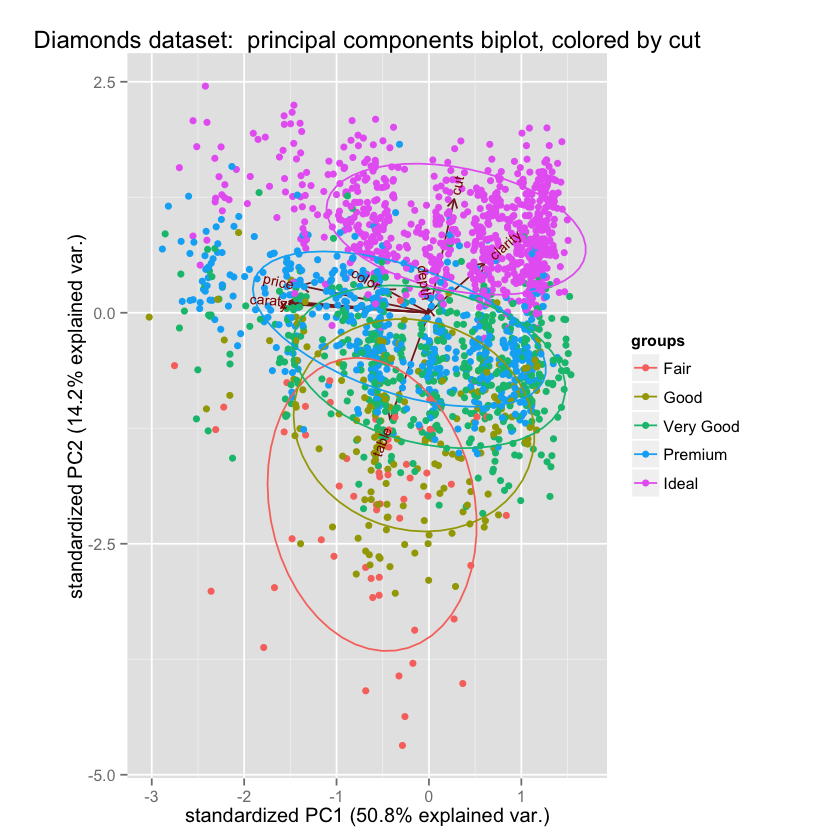

In [20]:
numeric.diamonds.pca = prcomp(numeric.diamonds.sample, scale.=TRUE)
## biplot( numeric.diamonds.pca, xlabs=rep(".",sample.size) )

ggbiplot( numeric.diamonds.pca, var.scale = 1,
          groups = diamonds$cut[sample.row.ids], ellipse = TRUE ) +
          labs(title = "Diamonds dataset:  principal components biplot, colored by cut")

# More visualization examples are in the notebook  Diamonds.ipynb

geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.


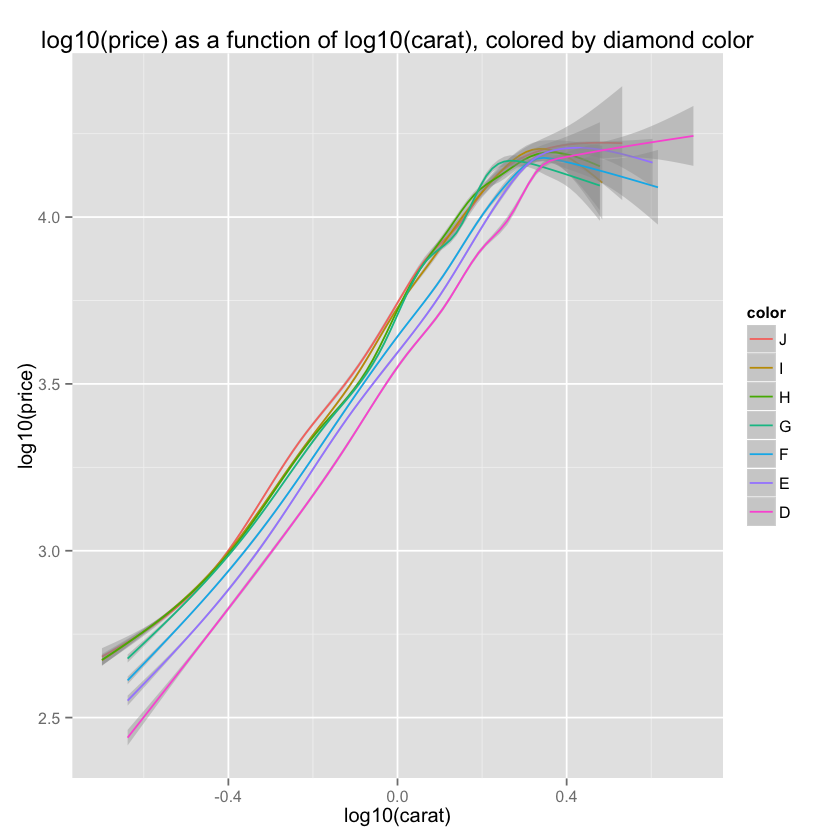

In [21]:
ggplot(data=diamonds, aes(x=log10(carat), y=log10(price), color=color)) + geom_smooth() +
     ggtitle( "log10(price) as a function of log10(carat), colored by diamond color")

geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.


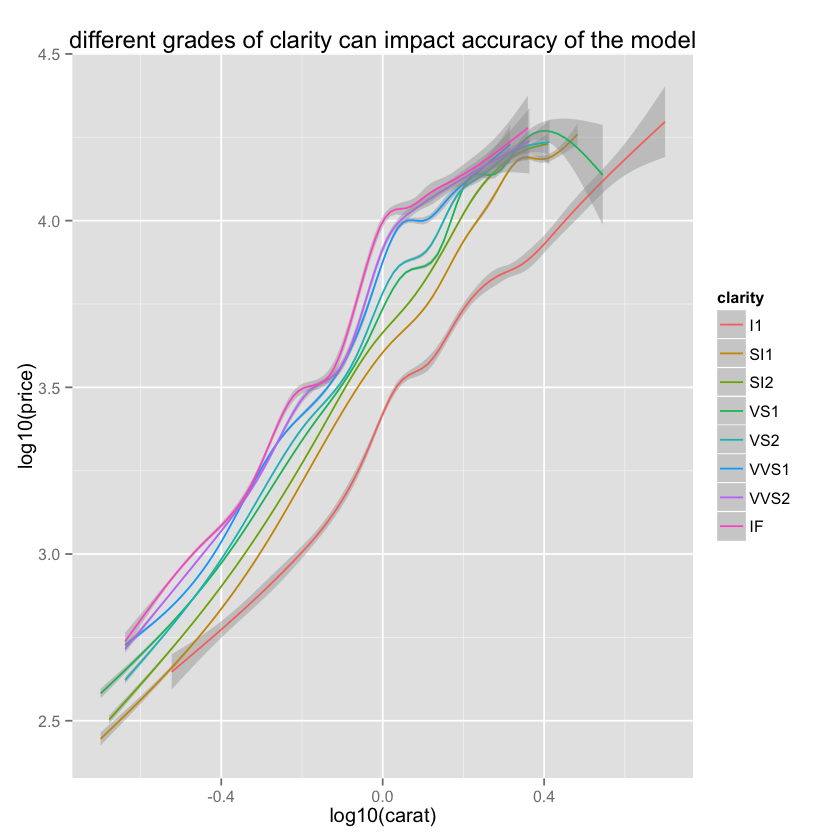

In [22]:
ggplot(data=diamonds, aes(x=log10(carat), y=log10(price), color=clarity)) +
     geom_smooth() +
     ggtitle( "different grades of clarity can impact accuracy of the model")

In [23]:
### another interesting plot, suggesting impacts on linearity by cut
# ggplot(data=diamonds, aes(x=log10(carat), y=log10(price), color=cut)) + geom_smooth() +
#     ggtitle( "log10(price) as a function of log10(carat), colored by cut")

<hr style="border-width:50px;">

# Step 1:  generate your Training Set and Test Set from numeric.diamonds

In [24]:
#  Please use exactly the following statements to generate these things:


set.seed( 123456789 ) ########## please enter your UCLA UID here !!!


n = nrow(numeric.diamonds)

training.sample.size = 0.75 * n  ###### Use 75% of the data for the training set

training.row.ids = sample( (1:n), training.sample.size )
       
my.training.set = numeric.diamonds[  training.row.ids, ]
my.test.set     = numeric.diamonds[ -training.row.ids, ]   # set complement of training.set.ids


# Step 2:  compute Accuracy of the 4 Baseline Models on your Test Set

As mentioned above, there are 4 Baseline Models:
<code>
      qda( cut ~ .,           data=my.training.set )
      lm(  price ~ .,         data=my.training.set )
      lm(  log10(price) ~ .,  data=my.training.set )
      glm( I(price>1500) ~ ., data=my.training.set, family=binomial )
</code>

Develop procedures to compute their accuracy:
one for classification models
(like lda() and qda() in the MASS package),
one for linear regression models (like lm()),
and one for logistic regression models (like glm(family=binomial)).

See the section <b>Measuring Accuracy of Models in this Assignment</b> below.


Then: use your procedures to compute the accuracy of the Baseline Models on your Test Set.

# Step 2:  build 4 Models improving on the Baseline Models

## Problem 1:  a LDA or QDA classification model that predicts a diamond's Cut.

An example of a possible model is:
<code>
sample_m1  =  qda( cut ~ price + table + color + clarity,       data=my.training.set )
</code>

If this model outperforms the first Baseline Model, you are done.

## Problem 2:  a linear regression model that predicts Price.

An example of a possible model is:
<code>
sample_m2  =  lm(  price ~ carat + x + y + z + clarity,         data=my.training.set )
</code>

## Problem 3: a linear regression model that predicts log10(Price).

An example of a possible model is:
<code>
sample_m3  =  lm(  log10(price) ~ table + log10(carat) + color, data=my.training.set )
</code>

## Problem 4:  a logistic regression model that predicts whether Price is above &dollar;1500.

An example of a possible model is:
<code>
sample_m4  =  glm( I(price>1500) ~ carat + table + clarity,   data=my.training.set, family = binomial )
</code>

Notice that the values of <code>I(price>1500)</code> are always 0 or 1.
This model's predictions will be <b>0</b> if the price is below &dollar;1500,
and <b>1</b> if the price is above &dollar;1500, so the resulting values are "binomial".

The dataset includes information on about 50 thousand diamonds.
About 20 thousand have a price below &dollar;1500; and the others have a price above.

Thus a model that always simply predicts prices above &dollar;1500 might be right about 60% of the time.
Your job is to do better than this baseline rate.


# Step 3: generate a CSV file "HW3_output.csv" including your model results

If these were your four models, then to complete the assignment you would create
a CSV file <tt>HW3_output.csv</tt> containing eight lines:
<code>
      33.333, qda( cut ~ .,           data=my.training.set )
      88.888, lm(  price ~ .,         data=my.training.set )
      77.777, lm(  log10(price) ~ .,  data=my.training.set )
      88.888, glm( I(price>1500) ~ ., data=my.training.set, family=binomial )
      44.444, qda( cut ~ price + table + color + clarity, data=my.training.set )
      99.999, lm( price ~ carat + x + y + z + clarity, data=my.training.set )
      99.999, lm( log10(price) ~ table + log10(carat) + color, data=my.training.set )
      99.999, glm( I(price>1500) ~ carat + table + clarity, data=my.training.set, family=binomial )
</code>

Each line gives <b>the accuracy of a model <u>on <tt>my.test.set</tt></u></b>,
and also <b>the exact command you used to generate your model</b>.
The first four lines are for the baseline models.
The second four lines are your improvements.

There is no length restriction on the lines; they can be as long as you want.
These examples above are just examples,
and they may not improve on the Baseline Models.

# Step 4: upload your CSV file and notebook to CCLE

Upload the files HW3_output.csv <u>and</u> your Jupyter notebook.

<hr style="border-width:50px;">

# Background Material

## R Formulas, Models, and the General Linear Model:

Chapter 11 of the <a href="https://cran.r-project.org/doc/manuals/R-intro.pdf">R Introduction Manual</a>
gives a good description of formulas, models, model updating (exploring alternative models), and the GLM.

<hr style="border-width:20px;">

### R formulas:

Sections 11.1 in Chapter 11 of the <a href="https://cran.r-project.org/doc/manuals/R-intro.pdf">R Introduction Manual</a>
hs a good description of formulas.  A few constructs are important for this assignment:
<ul><li> <b>Including an Intercept</b>:
<br/>
<code>  y ~ x</code><br/>
<code>  y ~ x + 1</code><br/>
<code>  y ~ 1 + x</code><br/>
An intercept is included by default,
so all of these formulas correspond to the same simple linear regression model of <code>y</code> on <code>x</code>.
<br/>
</li><li> <b>Omitting the Intercept</b>:
<br/>
<code>  y ~  x - 1</code><br/>
<code>  y ~  x + 0</code><br/>
<code>  y ~  0 + x</code><br/>
<code>  y ~ -1 + x</code><br/>
These formulas are all equivalent,
and correspond to the linear regression of <code>y</code> on <code>x</code> without an intercept.
<br/>
</li><li> <b>Log-transformed Variables</b>:
<br/>
<code>  log(y) ~ x</code><br/>
Regression on <code>x</code> of the transformed variable <code>log(y)</code> (with an implicit intercept term).
<br/>
</li><li> <b>Integer Powers of a Variable</b>:
<br/>
<code>  y ~ x^2</code><br/>
<code>  y ~ 1 + x + I(x^2)</code><br/>
<code>  y ~ poly(x,2)</code><br/>
regression of y on a quadratic polynomial of x.
<u>The first two formulas are equivalent --
the power <code>x^2</code> implicitly includes the powers below it.</u>
The third formula looks very similar, but is not completely equivalent:
it uses "orthogonal" polynomials (with no interaction between each other),
while the first two formulas use explicit powers, and interactions between them are considered.
<br/>
Note that the expression  <code>I(x^2)</code> represents an "insulated" new variable
whose values are squares of values of <code>x</code>.
<!--
<br/>
</li><li> <b>Integer Powers of a Variable</b>:
y ~ A*B
y ~ A + B + A:B
y ~ B %in% A
y ~ A/B Two factor non-additive model of y on A and B. The first two specify the same
crossed classification and the second two specify the same nested classification. In
abstract terms all four specify the same model subspace.
<br/>
</li><li> <b>Integer Powers of a Variable</b>:
y ~ (A + B + C)^2
y ~ A*B*C - A:B:C
Three factor experiment but with a model containing main effects and two factor
interactions only. Both formulae specify the same model.
<br/>
</li><li> <b>Integer Powers of a Variable</b>:
y ~ A * x
y ~ A/x
y ~ A/(1 + x) - 1
Separate simple linear regression models of y on x within the levels of A, with
different codings. The last form produces explicit estimates of as many different
intercepts and slopes as there are levels in A.
-->
</li></ul>

<hr style="border-width:20px;">

### Functions on R models:

Sections 11.3 in Chapter 11 of the <a href="https://cran.r-project.org/doc/manuals/R-intro.pdf">R Introduction Manual</a>
also gives a good description of functions on models that one can use:
<ul><li>
<b>coef</b>(model) <br/>
Extract the regression coefficient (matrix).
Long form: coefficients(object).
<br/>
<br/>
</li><li>
<b>formula</b>(model) <br/>
Extract the model formula.
<br/>
<br/>
</li><li>
<b>plot</b>(model) <br/>
Produce four plots, showing residuals, fitted values and some diagnostics.
<br/>
<br/>
</li><li>
<b>predict</b>(model, newdata=data.frame) <br/>
The data frame supplied must have variables specified with the same labels as the
original. The value is a vector or matrix of predicted values corresponding to the
determining variable values in data.frame.
<br/>
<br/>
</li><li>
<b>residuals</b>(model) <br/>
Extract the (matrix of) residuals, weighted as appropriate.
<br/>
<br/>
</li><li>
<b>step</b>(model) <br/>
Select a suitable model by adding or dropping terms and preserving hierarchies. The
model with the smallest value of AIC (Akaike’s An Information Criterion) discovered
in the stepwise search is returned.
<br/>
<br/>
</li><li>
<b>summary</b>(model) <br/>
Print a comprehensive summary of the results of the regression analysis.
<br/>
<br/>
</li><li>
<b>vcov</b>(model) <br/>
Returns the variance-covariance matrix of the main parameters of a fitted model
object.
</li></ul>

<hr style="border-width:20px;">

### The General Linear Model:

Sections 11.6 in Chapter 11 of the <a href="https://cran.r-project.org/doc/manuals/R-intro.pdf">R Introduction Manual</a>
includes a tutorial on the GLM, and options for the glm() function.

Relevant for this assignment:
<ul><li>
<code>glm(x ~ y, family = gaussian )</code>
    is equivalent to the usual linear regression model
<code>lm( x ~ y )</code>    
</li><li>
<code>glm(x ~ y, family = gaussian("log") )</code>
    is equivalent to the log-linear model
<code>lm( log(x) ~ y )</code>   
</li><li>
<code>glm(x ~ y, family = binomial )</code>
    is the logistic regression model
</li></ul>

<hr style="border-width:50px;">

# Example:  Building a Model (simple supervised learning)

### This example, discussed in class, uses the MASS package for supervised learning of LDA models.

### Construct a training set and test set (from the Iris dataset)

In [56]:
data(iris)

n = nrow(iris)

training.sample.size = floor( 0.75 * n )  ###### Use 75% of the data for the training set

iris.ids = (1:n)

training.set = sample( iris.ids, training.sample.size ) # Generate a random sample
test.set     = iris.ids[-training.set]       # The set complement of training.set

training.set

# table(iris$Species)                  # Tabulate the number of each species
# table(iris$Species[training.set])    # Tabulate species for the training set
# table(iris$Species[test.set])        # Tabulate species for the test set

[1]  49 105  22  41  58  85  86 111  56 143 121  20  44  80  72  71  83   1
 [19]  18  42  30 124  97 104 123  37 128   3  92  19 109  65 116  45   6  54
 [37] 144   2 132  31  51  68 102   9 145  57  93  62 130 149  34  69  75 119
 [55] 133 117  24  73  17 142  12  84 115 148  39 114  25  74  38  91   5  66
 [73] 136  32  53  63  60 127  99 126 113  81  28 138  98 107  79  26 120  40
 [91]  46  95 101 112 139  21  61  70  13  15  94 147 135  78  47  87 103  67
[109] 140  43  33   8

### Constructing an LDA model

In [57]:
if (!(is.element("MASS", installed.packages())))  install.packages("MASS")
library(MASS)

LDA.model = lda( Species ~ ., data = iris, subset = training.set )
LDA.model

Call:
lda(Species ~ ., data = iris, subset = training.set)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3303571  0.3392857  0.3303571 

Group means:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa         5.040541    3.445946     1.489189   0.2540541
versicolor     5.881579    2.760526     4.234211   1.3263158
virginica      6.529730    2.929730     5.486486   2.0054054

Coefficients of linear discriminants:
                    LD1        LD2
Sepal.Length  0.6227118  0.2626226
Sepal.Width   1.5472940  1.9473700
Petal.Length -1.9912981 -1.1088243
Petal.Width  -2.6536360  3.0491577

Proportion of trace:
   LD1    LD2 
0.9908 0.0092 

### Simple accuracy calculation (for a classification model)

In [58]:
predictions = predict( LDA.model, subset(iris[test.set, 1:4]), data=iris )

incorrect.predictions  =  (predictions$class != iris$Species[test.set] )

incorrect.ids <-  test.set[incorrect.predictions]

# iris[ incorrect.ids , ]

In [59]:
confusion.matrix = table( iris$Species[test.set], predictions$class )
confusion.matrix

            
             setosa versicolor virginica
  setosa         13          0         0
  versicolor      0         12         0
  virginica       0          1        12

In [60]:
accuracy = (training.sample.size - length(incorrect.ids)) / training.sample.size
accuracy

[1] 0.9910714

<hr style="border-width:50px;">

# Examples:  Measuring Accuracy of Models in this Assignment

## Accuracy of an LDA or QDA model is the percentage of correct classifications

## FILL THIS IN:

In [30]:
 classification_accuracy = function( model, test.data, test.solutions ) {
     count = 0
     predictions = predict( model, test.data)

    incorrect.predictions  =  (predictions$class != test.solutions  )
    n = length(incorrect.predictions[incorrect.predictions==TRUE])
    test.sample.size = length(test.solutions) 
    incorrect.ids <-  test.solutions[incorrect.predictions]
    
    confusion.matrix = table( test.solutions, predictions$class)
    accuracy = (test.sample.size - length(incorrect.ids)) / test.sample.size
     return(accuracy)
 }

In [61]:
classification_accuracy( LDA.model, iris[test.set, 1:4], iris[test.set,5])

# should be about  0.97

[1] 0.9736842

## Accuracy of a Linear Regression model is its R<sup>2</sup> value

## FILL THIS IN:

In [32]:
 linear_regression_accuracy = function( model, test.data, test.solutions ) {
    predictions = predict( model, subset(test.data))
    mse = sum((test.solutions - predictions)^2)/sum((test.solutions - mean(test.solutions))^2)
    accuracy = 1-mse
    return(accuracy)
 }

In [62]:
sample.LR.model = lm( Petal.Length ~ Petal.Width, data = iris, subset= training.set )
linear_regression_accuracy( sample.LR.model, iris[test.set,], iris$Petal.Length[test.set] )

# should be about  0.93

[1] 0.9285199

## Accuracy of a Logistic Regression model is the percentage of correct classifications

## FILL THIS IN:

In [34]:
 logistic_regression_accuracy = function( model, test.data, test.solutions ) {
    pred = predict( model,test.data, type="response")     
    predictions = I(pred>0.5)
    correct.predictions = ifelse(predictions == test.solutions, 1, 0)
    Accuracy = sum(correct.predictions) / length(predictions)
    return(Accuracy)
 }

In [63]:
LRiris = transform( iris, Species = I(Species == 'Virginica') )

head(LRiris)  # For logistic regression, the Species is converted to {0, 1}

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,FALSE
2,4.9,3,1.4,0.2,FALSE
3,4.7,3.2,1.3,0.2,FALSE
4,4.6,3.1,1.5,0.2,FALSE
5,5,3.6,1.4,0.2,FALSE
6,5.4,3.9,1.7,0.4,FALSE


In [64]:
sample.LR.model = suppressWarnings( glm( Species ~ ., data = LRiris,
                                        subset=training.set, family='binomial' ) )

logistic_regression_accuracy( sample.LR.model, LRiris[test.set,], LRiris$Species[test.set] )

#  should be close to 1

[1] 1

<hr style="border-width:50px;">

## Computing Accuracy of the Baseline Models

In [37]:
baseline_m1 = qda( cut ~ .,             data=my.training.set )
baseline_m1
cat(sprintf("\nClassification Accuracy: %8.6f\n",
            classification_accuracy(baseline_m1, my.test.set, my.test.set$cut )))
Table = cbind( classification_accuracy(baseline_m1, my.test.set, my.test.set$cut )*100, "qda( cut ~ .,             data=my.training.set )")
write.table(Table, file="HW3_test.csv",sep=",",append=TRUE,row.names=FALSE,col.names=FALSE)

baseline_m2 = lm(  price ~ .,           data=my.training.set )
summary(baseline_m2)
cat(sprintf("\nLinear Regression Accuracy: %8.6f\n",
            linear_regression_accuracy(baseline_m2, my.test.set, my.test.set$price )))
Table = cbind( linear_regression_accuracy(baseline_m2, my.test.set, my.test.set$price )*100, "lm(  price ~ .,           data=my.training.set )")
write.table(Table, file="HW3_test.csv",sep=",",append=TRUE,row.names=FALSE,col.names=FALSE)

baseline_m3 = lm(  log10(price) ~ .,    data=my.training.set )
summary(baseline_m3)
cat(sprintf("\nLinear Regression Accuracy: %8.6f\n",
            linear_regression_accuracy(baseline_m3, my.test.set, log10(my.test.set$price) )))
Table = cbind( linear_regression_accuracy(baseline_m3, my.test.set, log10(my.test.set$price))*100, "lm(  log10(price) ~ .,    data=my.training.set )")
write.table(Table, file="HW3_test.csv",sep=",",append=TRUE,row.names=FALSE,col.names=FALSE)

baseline_m4 = glm( I(price>1500) ~ ., data=my.training.set, family=binomial )
summary(baseline_m4)
cat(sprintf("\nLogistic Regression Accuracy: %8.6f\n",
            logistic_regression_accuracy(baseline_m4, my.test.set, I(my.test.set$price>1500) )))
Table = cbind( logistic_regression_accuracy(baseline_m4, my.test.set, I(my.test.set$price>1500) )*100, "glm( I(price>1500) ~ ., data=my.training.set, family=binomial )")
write.table(Table, file="HW3_test.csv",sep=",",append=TRUE,row.names=FALSE,col.names=FALSE)

Call:
qda(cut ~ ., data = my.training.set)

Prior probabilities of groups:
         1          2          3          4          5 
0.02972305 0.09077646 0.22361523 0.25637982 0.39950544 

Group means:
      carat    color  clarity    depth    table    price        x        y
1 1.0539933 3.882696 3.032446 64.08245 59.05283 4412.210 6.261814 6.196972
2 0.8512803 3.583220 3.608009 62.35451 58.70204 3949.846 5.844906 5.857137
3 0.8067743 3.563198 3.992149 61.81805 57.94710 3987.852 5.741486 5.770880
4 0.8930777 3.694252 3.748939 61.26964 58.75147 4595.031 5.976223 5.948487
5 0.7028794 3.528906 4.459272 61.71229 55.94369 3453.603 5.506949 5.518003
         z
1 3.994359
2 3.644933
3 3.557922
4 3.651854
5 3.401427


Classification Accuracy: 0.588576



Call:
lm(formula = price ~ ., data = my.training.set)

Residuals:
     Min       1Q   Median       3Q      Max 
-23597.9   -624.0   -124.8    488.7   9913.9 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2124.774    760.802   2.793  0.00523 ** 
carat       10846.016     63.551 170.666  < 2e-16 ***
cut           115.957      6.650  17.437  < 2e-16 ***
color        -325.002      3.785 -85.863  < 2e-16 ***
clarity       501.060      4.097 122.298  < 2e-16 ***
depth         -21.492     11.152  -1.927  0.05397 .  
table         -28.886      3.422  -8.442  < 2e-16 ***
x            -412.950     97.282  -4.245 2.19e-05 ***
y             132.000     26.926   4.902 9.51e-07 ***
z           -1007.682    172.460  -5.843 5.17e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1223 on 40430 degrees of freedom
Multiple R-squared:  0.9066,	Adjusted R-squared:  0.9065 
F-statistic: 4.358e+04 on 9 and 40430 DF,  p-val


Linear Regression Accuracy: 0.905615



Call:
lm(formula = log10(price) ~ ., data = my.training.set)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.80927 -0.03911  0.00152  0.04241  0.98526 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.5644454  0.0402269  -14.03  < 2e-16 ***
carat       -0.4764315  0.0033602 -141.79  < 2e-16 ***
cut          0.0107754  0.0003516   30.64  < 2e-16 ***
color       -0.0338669  0.0002001 -169.22  < 2e-16 ***
clarity      0.0529035  0.0002166  244.21  < 2e-16 ***
depth        0.0074528  0.0005897   12.64  < 2e-16 ***
table        0.0030894  0.0001809   17.08  < 2e-16 ***
x            0.4303221  0.0051437   83.66  < 2e-16 ***
y           -0.0112612  0.0014237   -7.91 2.64e-15 ***
z            0.3253675  0.0091187   35.68  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06468 on 40430 degrees of freedom
Multiple R-squared:  0.9785,	Adjusted R-squared:  0.9785 
F-statistic: 2.047e+05 on 9


Linear Regression Accuracy: 0.944905


Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred


Call:
glm(formula = I(price > 1500) ~ ., family = binomial, data = my.training.set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.1331  -0.0015   0.0000   0.0002   5.9831  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -130.40452   11.40402 -11.435  < 2e-16 ***
carat         11.08001    3.54940   3.122  0.00180 ** 
cut            0.61468    0.04688  13.111  < 2e-16 ***
color         -1.37590    0.04130 -33.318  < 2e-16 ***
clarity        1.99017    0.05348  37.216  < 2e-16 ***
depth          0.43074    0.14754   2.919  0.00351 ** 
table          0.13722    0.02554   5.374 7.71e-08 ***
x              6.78351    0.83227   8.151 3.62e-16 ***
y              7.16077    1.48788   4.813 1.49e-06 ***
z              3.65756    2.62320   1.394  0.16322    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 53369.5  on 40439  degrees of freedo


Logistic Regression Accuracy: 0.977745


## Now: improve on the Baseline Models

In [38]:
#  The Baseline models:

m1 = qda( cut ~ .,           data=my.training.set )
m2 = lm(  price ~ .,         data=my.training.set )
m3 = lm(  log10(price) ~ .,  data=my.training.set )
m4 = glm( I(price>1500) ~ ., data=my.training.set, family = binomial )

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred

## Improved Models

In [39]:
better.QDA.model =  qda( cut ~ log10(price) + log10(table) + clarity + log10(carat) + depth + color + x + z, data=my.training.set )
cat(sprintf("\nClassification Accuracy: %8.6f\n",
            classification_accuracy(better.QDA.model, my.test.set, my.test.set$cut )))
Table = cbind( classification_accuracy(better.QDA.model, my.test.set, my.test.set$cut)*100, "qda( cut ~ log10(price) + log10(table) + clarity + log10(carat) + depth + color + x + z, data=my.training.set )")
write.table(Table, file="HW3_output.csv",sep=",",append=TRUE,row.names=FALSE,col.names=FALSE)


better.LR.model = lm( price ~ carat + log10(cut) + log10(clarity) + color + log10(x) + log10(depth) + table + y, data=my.training.set )
cat(sprintf("\nLinear Regression Accuracy: %8.6f\n",
            linear_regression_accuracy(better.LR.model, my.test.set, my.test.set$price )))
Table = cbind(linear_regression_accuracy(better.LR.model, my.test.set, my.test.set$price )*100, "lm( price ~ carat + log10(cut) + log10(clarity) + color + log10(x) + log10(depth) + table + y, data=my.training.set ))")
write.table(Table, file="HW3_output.csv",sep=",",append=TRUE,row.names=FALSE,col.names=FALSE)


better.LR.model = lm(  log10(price) ~ table + log10(carat) + color + log10(clarity), data=my.training.set )
cat(sprintf("\nLinear Regression Accuracy: %8.6f\n",
            linear_regression_accuracy(better.LR.model, my.test.set, log10(my.test.set$price) )))
Table = cbind(linear_regression_accuracy(better.LR.model, my.test.set, log10(my.test.set$price) )*100, "lm(  log10(price) ~ table + log10(carat) + color + log10(clarity), data=my.training.set )")
write.table(Table, file="HW3_output.csv",sep=",",append=TRUE,row.names=FALSE,col.names=FALSE)


better.Logistic.model = glm( I(price>1500) ~ carat + table + log10(clarity) + cut + z + x + depth + color , data=my.training.set, family = binomial )
cat(sprintf("\nLogistic Regression Accuracy: %8.6f\n",
            logistic_regression_accuracy(better.Logistic.model, my.test.set, I(my.test.set$price>1500) )))
Table = cbind(logistic_regression_accuracy(better.Logistic.model, my.test.set, I(my.test.set$price>1500) )*100, "glm( I(price>1500) ~ carat + table + log10(clarity) + cut + z + x + depth + color , data=my.training.set, family = binomial )")
write.table(Table, file="HW3_output.csv",sep=",",append=TRUE,row.names=FALSE,col.names=FALSE)


Classification Accuracy: 0.653264

Linear Regression Accuracy: 0.917299

Linear Regression Accuracy: 0.979787


Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred


Logistic Regression Accuracy: 0.984199


<hr style="border-width:50px;">

# Examples: Converting between categorical and numeric variables

R uses a jargon for categorical values that some find confusing:
<ul><li>
a categorical variable is called a <b>factor</b>
</li><li>
the set of all possible factor values is called its <b>levels</b>
</li><li>
the levels of a factor are not the same thing as strings --- they are symbolic values.
</li></ul>

This may seem odd at first, but it is very useful, and it is easy to get used to.

In [40]:
if (!(is.element("leaps", installed.packages())))  install.packages("leaps", dependencies=TRUE, repos='http://cran.rstudio.com/')
  
library(leaps)

#  regsubsets() generates regression models for subsets of sizes up to nvmax
#  regsubsets( y ~ x, data=D, nbest=3 )  #  generates the 3 best models of each size

# ?regsubsets

In [41]:
#  Altering the names of levels (dangerous)

levels(iris$Species) = c( 'Setosa', 'Versicolor', 'Virginica' )
levels(iris$Species)

[1] "Setosa"     "Versicolor" "Virginica"

In [42]:
# Converting numeric values to levels:

cut.factor = as.factor( numeric.diamonds$cut )
levels(cut.factor)

[1] "1" "2" "3" "4" "5"

In [43]:
# Converting numeric values to levels:

cut.factor.numeric = unclass( cut.factor )
# cut.factor.numeric = as.numeric( cut.factor )    ## more or less equivalent

unique( cut.factor.numeric )  # find all unique values (in a list of values)


[1] 5 4 2 3 1

<hr style="border-width:50px;">

# Examples: Transforming variables to make them more nearly Gaussian

In [44]:
# ?transform

transformed.diamonds  =  transform(
                                   numeric.diamonds,
                                   log10_carat = log10(carat)
                                  )

#  this example transform adds a log10_carat column 

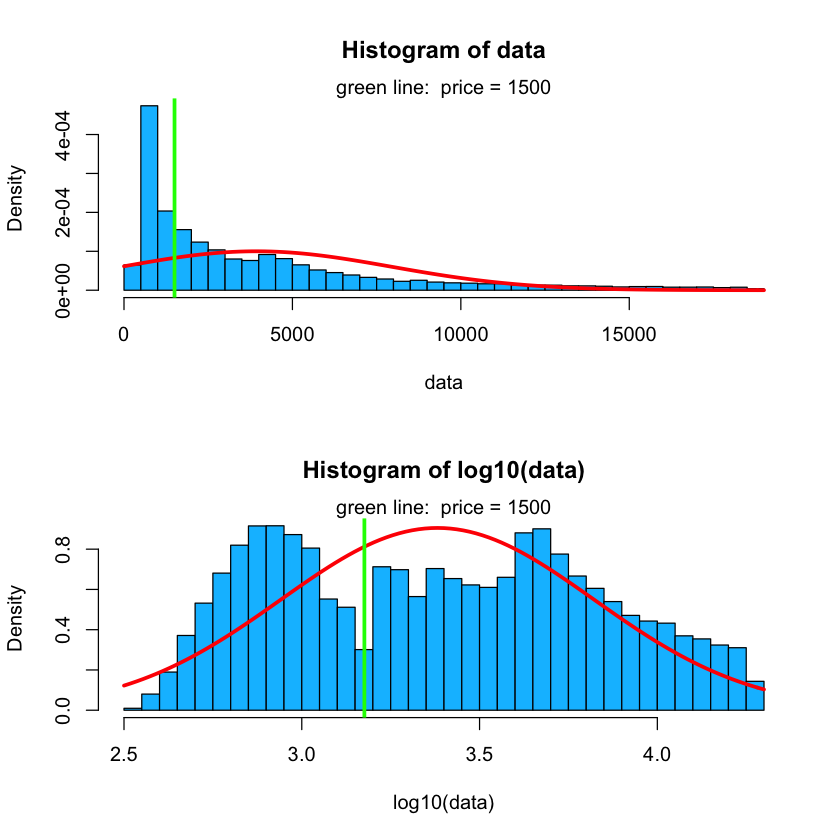

In [45]:
opar = par(mfrow=c(2,1))

data = numeric.diamonds$price

hist( data, probability=TRUE, col="deepskyblue", breaks=50)
curve( dnorm(x,mean(data),sd(data)), col="red", lwd=3, add=TRUE)
abline( v=1500, col="green", lwd=3 )
mtext( "green line:  price = 1500" )
           
hist( log10(data), probability=TRUE, col="deepskyblue", breaks=50)
curve( dnorm(x,mean(log10(data)),sd(log10(data))), col="red", lwd=3, add=TRUE)
abline( v=log10(1500), col="green", lwd=3)
mtext( "green line:  price = 1500" )
  
par(opar)

geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.


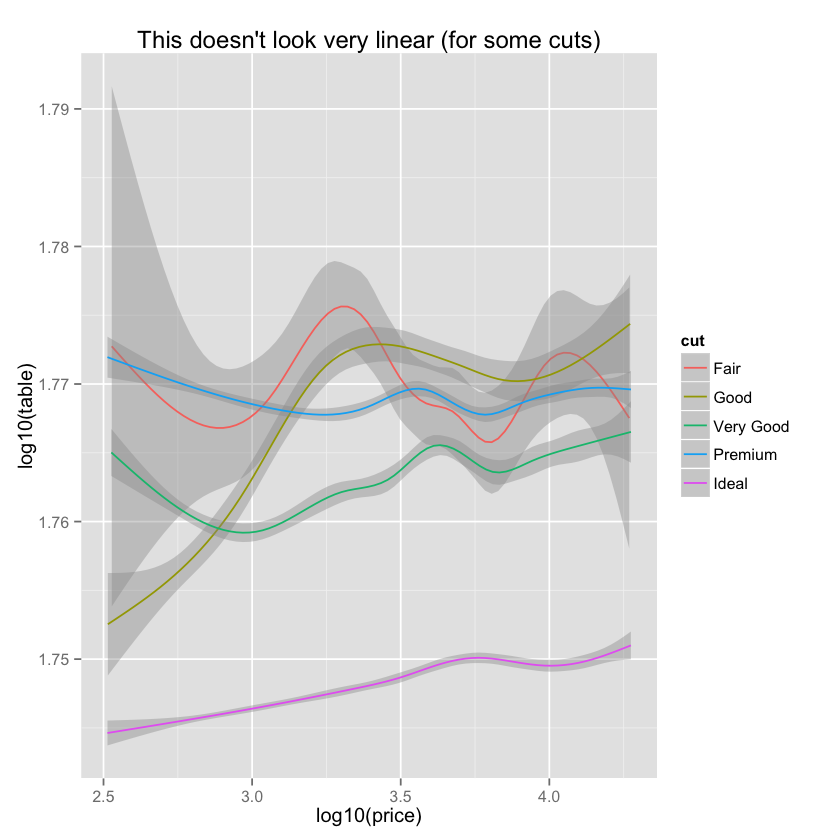

In [46]:
ggplot( data=diamonds, aes(x=log10(price), y=log10(table), color=cut)) +
        geom_smooth() + ggtitle("This doesn't look very linear (for some cuts)")

In [47]:
#  Possibly of interest:
#  Box-Cox transformations are a popular way of making variables closer to Gaussian

# library(MASS)
# help(boxcox)
# example(boxcox)

<hr style="border-width:50px;">

## fyi: regsubsets() might be useful for improving regression models

In [48]:
if (!(is.element("leaps", installed.packages())))  install.packages("leaps")
  
library(leaps)

#  regsubsets() generates regression models for subsets of sizes up to nvmax
#  regsubsets( y ~ x, data=D, nbest=3 )  #  generates the 3 best models of each size

# ?regsubsets

### regsubsets() searches for the best subsets of the variables

In [49]:
rs = regsubsets( carat ~ ., data=numeric.diamonds, nbest=1, nvmax=5 )

summary(rs)

Subset selection object
Call: regsubsets.formula(carat ~ ., data = numeric.diamonds, nbest = 1, 
    nvmax = 5)
9 Variables  (and intercept)
        Forced in Forced out
cut         FALSE      FALSE
color       FALSE      FALSE
clarity     FALSE      FALSE
depth       FALSE      FALSE
table       FALSE      FALSE
price       FALSE      FALSE
x           FALSE      FALSE
y           FALSE      FALSE
z           FALSE      FALSE
1 subsets of each size up to 5
Selection Algorithm: exhaustive
         cut color clarity depth table price x   y   z  
1  ( 1 ) " " " "   " "     " "   " "   " "   "*" " " " "
2  ( 1 ) " " " "   " "     " "   " "   "*"   "*" " " " "
3  ( 1 ) " " " "   " "     "*"   " "   "*"   "*" " " " "
4  ( 1 ) " " "*"   "*"     " "   " "   "*"   "*" " " " "
5  ( 1 ) " " "*"   "*"     "*"   " "   "*"   "*" " " " "

In [50]:
rs.summary = summary(rs)
str(rs.summary)

List of 8
 $ which : logi [1:5, 1:10] TRUE TRUE TRUE TRUE TRUE FALSE ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1" "2" "3" "4" ...
  .. ..$ : chr [1:10] "(Intercept)" "cut" "color" "clarity" ...
 $ rsq   : num [1:5] 0.956 0.97 0.972 0.975 0.976
 $ rss   : num [1:5] 532 366 336 305 284
 $ adjr2 : num [1:5] 0.956 0.97 0.972 0.975 0.976
 $ cp    : num [1:5] 48142 16236 10470 4545 665
 $ bic   : num [1:5] -168463 -188667 -193283 -198479 -202174
 $ outmat: chr [1:5, 1:9] " " " " " " " " ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1  ( 1 )" "2  ( 1 )" "3  ( 1 )" "4  ( 1 )" ...
  .. ..$ : chr [1:9] "cut" "color" "clarity" "depth" ...
 $ obj   :List of 28
  ..$ np       : int 10
  ..$ nrbar    : int 45
  ..$ d        : num [1:10] 5.39e+04 2.66e+04 3.28e+03 1.26e+05 1.48e+11 ...
  ..$ rbar     : num [1:45] 3.54 5.73 4.05 3930.99 5.73 ...
  ..$ thetab   : num [1:10] 7.98e-01 6.48e-01 3.52e-01 4.28e-03 3.49e-05 ...
  ..$ first    : int 2
  ..$ last     : int 1

In [51]:
cat('subset of variables included in each model:\n#var')
print(rs.summary$which * 1)

subset of variables included in each model:
#var  (Intercept) cut color clarity depth table price x y z
1           1   0     0       0     0     0     0 1 0 0
2           1   0     0       0     0     0     1 1 0 0
3           1   0     0       0     1     0     1 1 0 0
4           1   0     1       1     0     0     1 1 0 0
5           1   0     1       1     1     0     1 1 0 0


In [52]:
N = nrow(rs.summary$which)
for (i in 1:N) {
    cat(sprintf('\n----- model %d: ----------------------\n', i))
    print( coef(rs, i) )
    cat(sprintf(" R^2:  %7.3f\n", rs.summary$rsq[i] ))
    cat(sprintf(" BIC:    %8.4g\n", rs.summary$bic[i] ))
}


----- model 1: ----------------------
(Intercept)           x 
 -1.5743036   0.4138444 
 R^2:    0.956
 BIC:    -1.685e+05

----- model 2: ----------------------
  (Intercept)         price             x 
-1.146097e+00  3.019303e-05  3.184273e-01 
 R^2:    0.970
 BIC:    -1.887e+05

----- model 3: ----------------------
  (Intercept)         depth         price             x 
-2.172258e+00  1.649579e-02  2.987375e-05  3.199644e-01 
 R^2:    0.972
 BIC:    -1.933e+05

----- model 4: ----------------------
  (Intercept)         color       clarity         price             x 
-9.008250e-01  1.728075e-02 -1.903216e-02  3.933705e-05  2.719805e-01 
 R^2:    0.975
 BIC:    -1.985e+05

----- model 5: ----------------------
  (Intercept)         color       clarity         depth         price 
-1.772863e+00  1.619727e-02 -1.726936e-02  1.365875e-02  3.829595e-05 
            x 
 2.771206e-01 
 R^2:    0.976
 BIC:    -2.022e+05


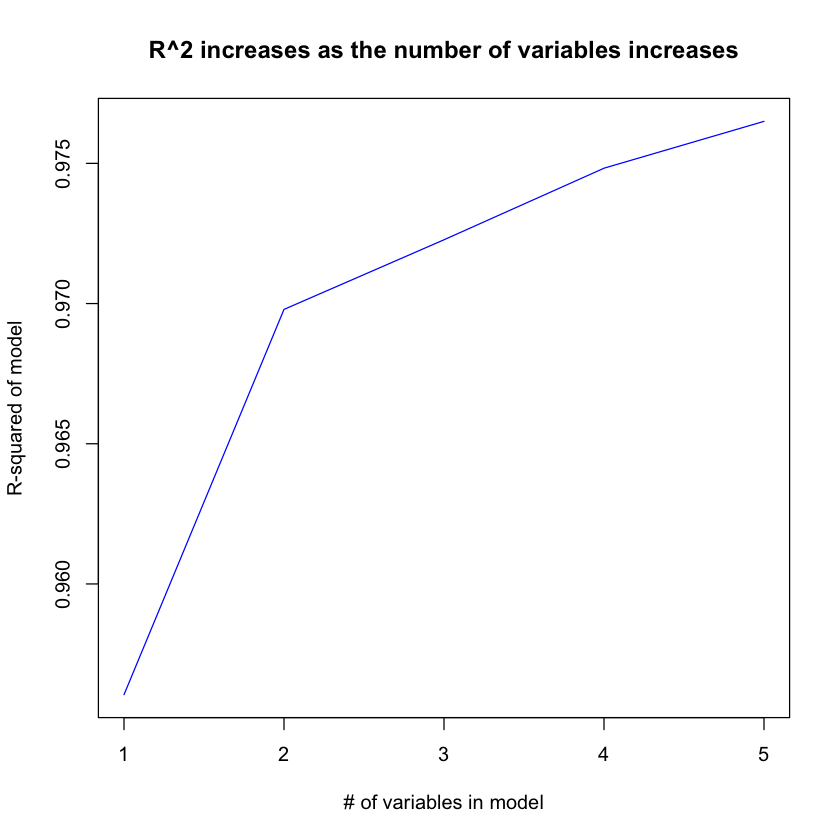

In [53]:
plot(rs.summary$rsq, type="l", col="blue",
     xlab="# of variables in model", ylab="R-squared of model",
     main="R^2 increases as the number of variables increases")

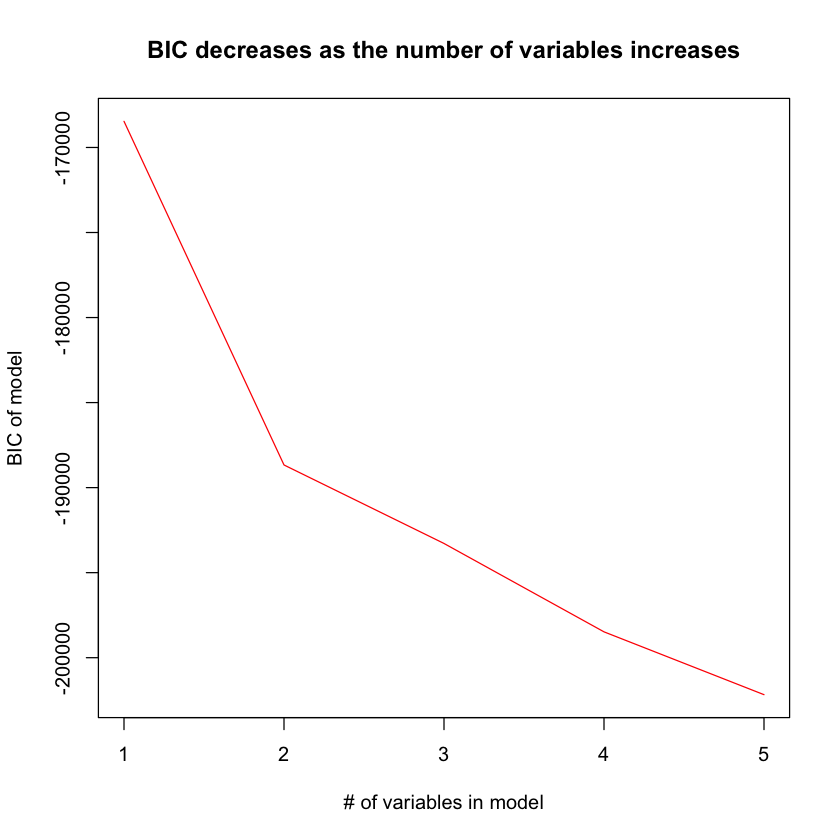

In [54]:
plot(rs.summary$bic, type="l", col="red",
     xlab="# of variables in model", ylab="BIC of model",
     main="BIC decreases as the number of variables increases")

In [55]:
# ?summary.regsubsets